<a href="https://colab.research.google.com/github/Steve-siddu/Machine-Learning/blob/main/EDA_on_Haberman_Cancer_Survival_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

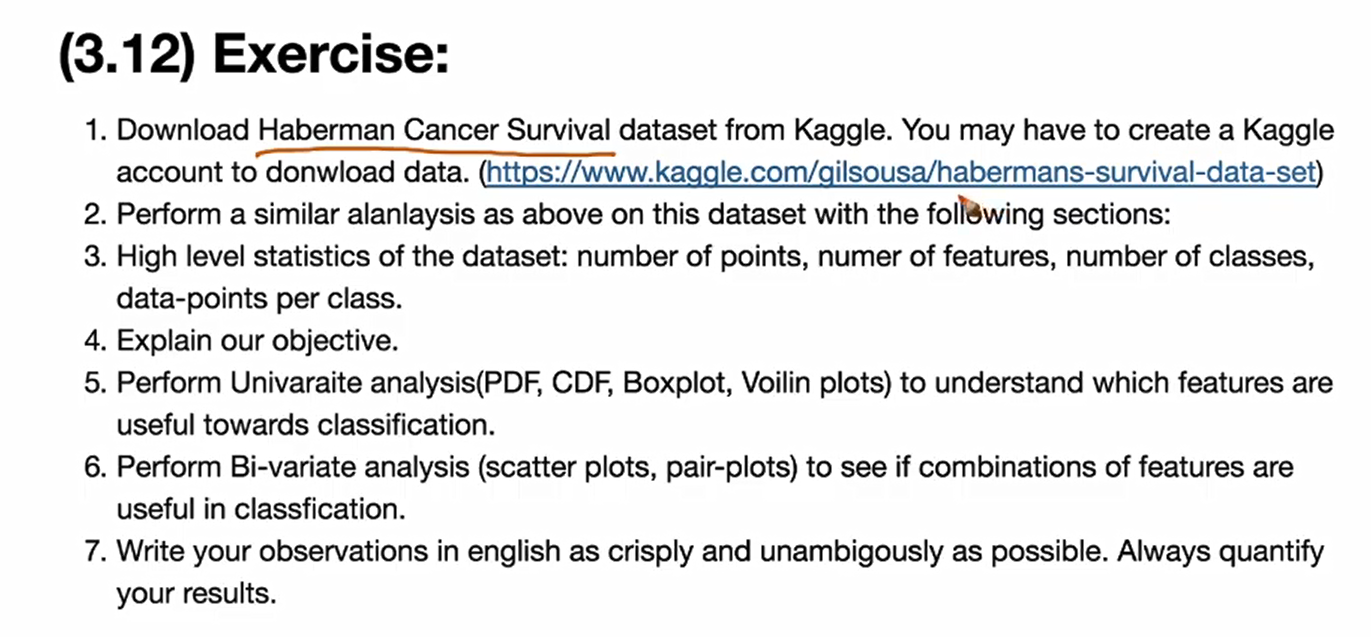

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Drive configuration
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# data load from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/haberman.csv')

In [4]:
df.shape

(305, 4)

In [5]:
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [6]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [7]:
df['1.1'].value_counts()

1    224
2     81
Name: 1.1, dtype: int64

In [22]:
df.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Classes:

Number of classes are **TWO** i.e., 1 & 2

224 are of class 1

81 are of class 2

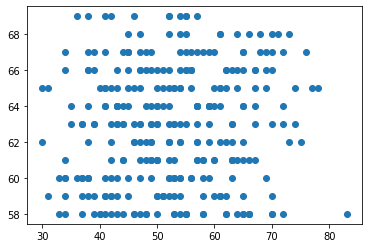

In [8]:
plt.scatter(df['30'], df['64'])
plt.show()

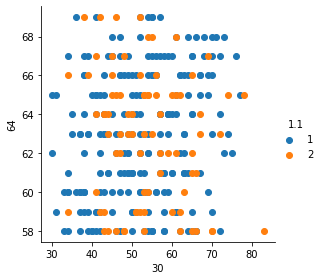

In [9]:
sns.FacetGrid(df, hue='1.1', height=4) \
  .map(plt.scatter, '30', '64') \
  .add_legend();

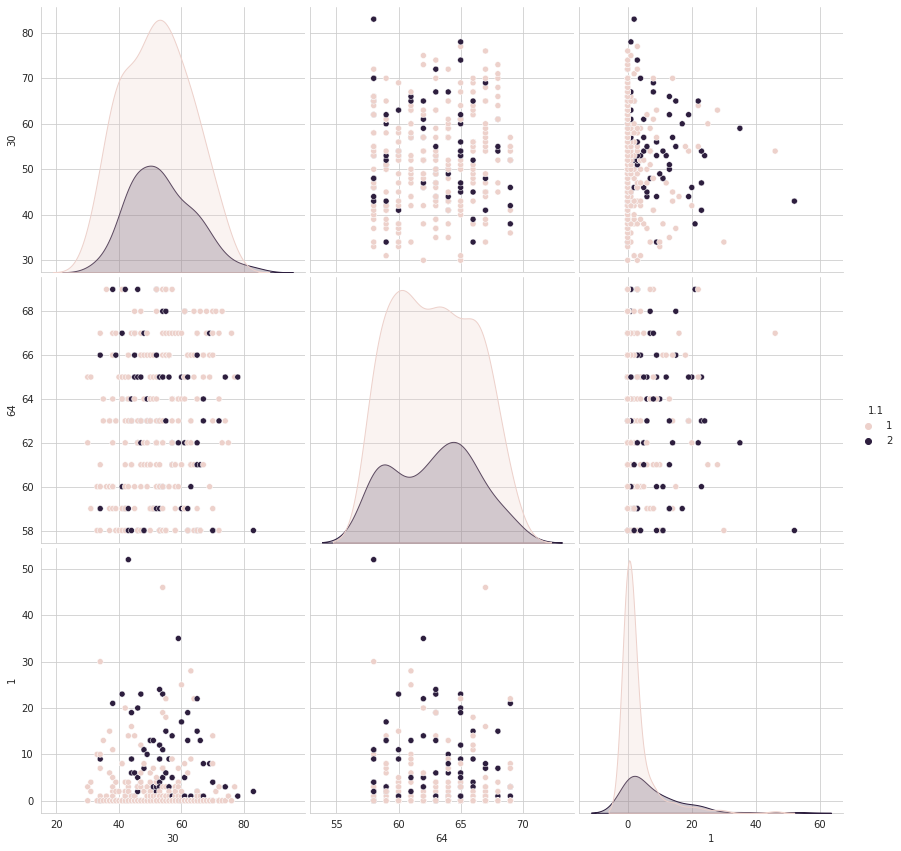

In [10]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='1.1', height=4)
plt.show()

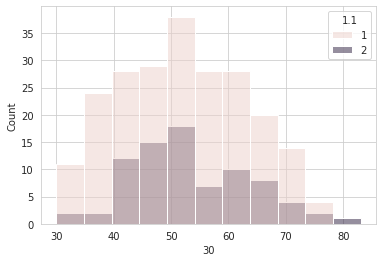

In [20]:
sns.histplot(df, x=df['30'], hue=df['1.1'])
plt.show()

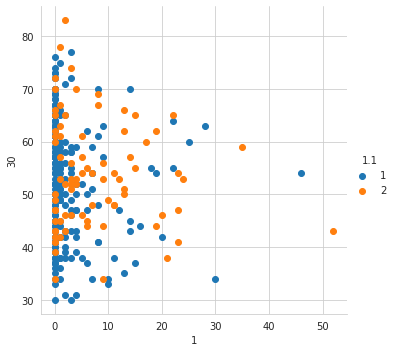

In [29]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='1.1', height=5) \
  .map(plt.scatter, '1', '30') \
  .add_legend();

plt.show()


In [54]:
ones = df[:][df['1.1']==1]
twos = df[:][df['1.1']==2]

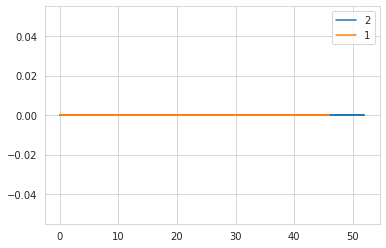

In [55]:
plt.plot(twos['1'], np.zeros_like(twos['1']), label='2')
plt.plot(ones['1'], np.zeros_like(ones['1']), label='1')
plt.legend()
plt.show()

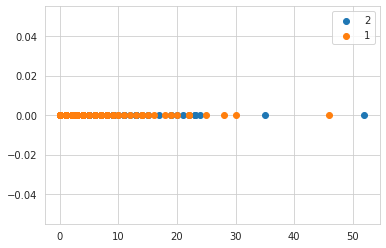

In [56]:
plt.scatter(twos['1'], np.zeros_like(twos['1']), label='2')
plt.scatter(ones['1'], np.zeros_like(ones['1']), label='1')
plt.legend()
plt.show()

Observation: The ones and twos points are on top of each other. It is the reason we are only seeing one color on the graph.

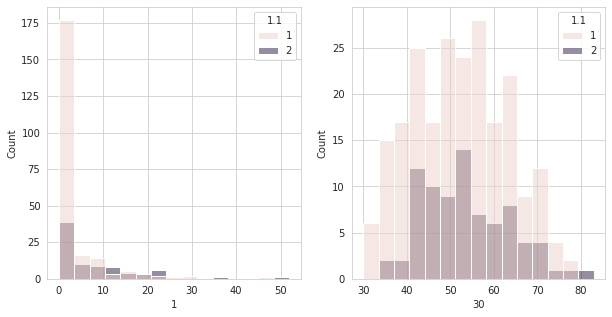

In [57]:
# sns.histplot(ones, x=ones['1'], bins=15)
# sns.histplot(twos, x=twos['1'], bins=15)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot( df, ax=axes[0], x=df['1'], hue='1.1', bins=15)
sns.histplot( df, ax=axes[1], x=df['30'], hue='1.1', bins=15)

Observation:
From the above graph we can conclude that using feature '30' it is hard to distinguish the class(dependendent variable). However, we can see that feature '1' can distinguish and isolate the data points very well.

Let's apply Probability Distribution and Cumulative distribution function idividually for class '1' and class '2'.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


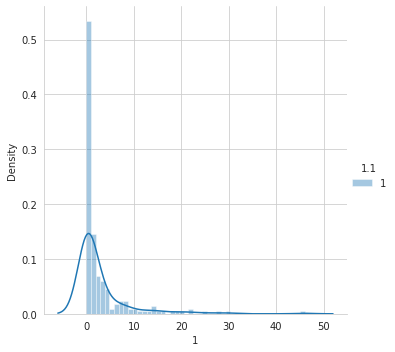

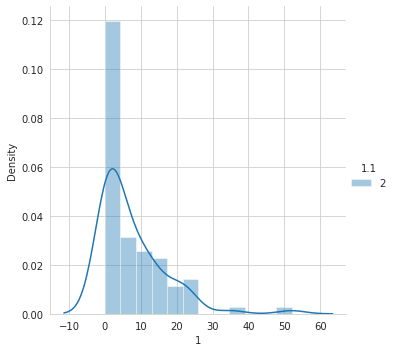

In [70]:

sns.FacetGrid(ones, hue='1.1', height=5, sharey=True) \
  .map(sns.distplot, '1') \
  .add_legend();

sns.FacetGrid(twos, hue='1.1', height=5, sharey= True) \
  .map(sns.distplot, '1') \
  .add_legend();

plt.show()

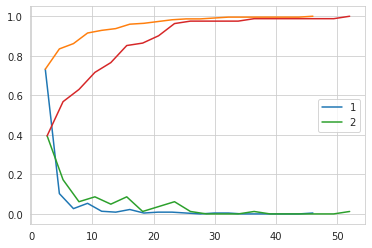

In [77]:
counts, bin_edges_ones = np.histogram(ones['1'], bins=20, density=True)
# print(counts, bin_edges)
# print(setosa['petal_length'].value_counts())
# print(sum(counts))

pdf_ones = counts / sum(counts)
cdf_ones = np.cumsum(pdf_ones)

# Twos
counts, bin_edges_twos = np.histogram(twos['1'], bins=20, density=True)
pdf_twos = counts / sum(counts)
cdf_twos = np.cumsum(pdf_twos)


# plotting pdf and cdf
plt.plot(bin_edges_ones[1:], pdf_ones, label='1')
plt.plot(bin_edges_ones[1:], cdf_ones)
plt.plot(bin_edges_twos[1:], pdf_twos, label='2')
plt.plot(bin_edges_twos[1:], cdf_twos)
plt.legend()

plt.show()

Observations:

Classification based on feature '1'

1. (0-5) && (26+) => class '1'
2. (6-25) && (45+)=> class '2'


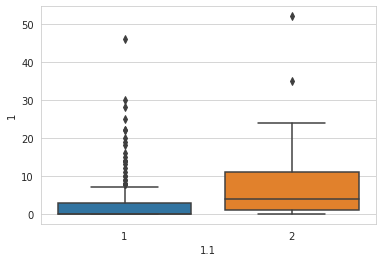

In [78]:
sns.boxplot(x='1.1', y='1', data=df)

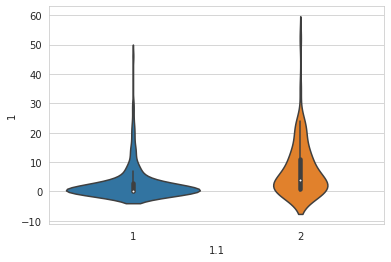

In [79]:
sns.violinplot(x='1.1', y='1', data=df)

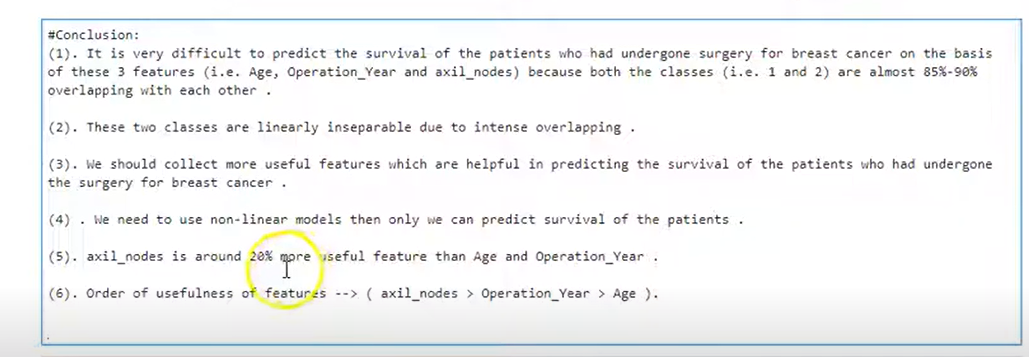